In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [36]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

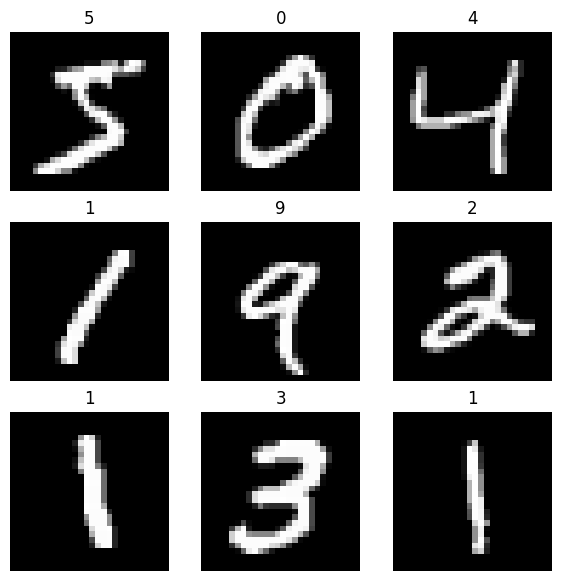

In [37]:
plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap="gray")
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

In [38]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [39]:
datagen=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode="nearest"
)

In [40]:
datagen.fit(x_train)
train_generator=datagen.flow(x_train,y_train,batch_size=32)

In [41]:
model=tf.keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))
          
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])

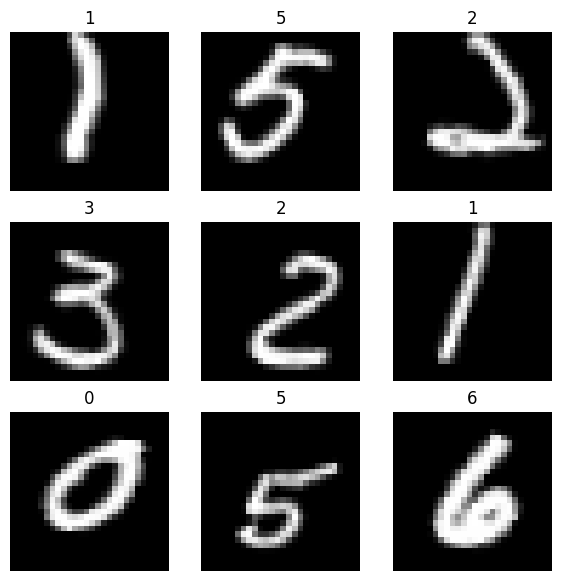

In [42]:
plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_generator[i][0][0],cmap="gray")
    plt.title(str(np.argmax(train_generator[i][1][0])))
    plt.axis('off')
plt.show()

In [43]:
model.fit(train_generator,
          steps_per_epoch=len(x_train) // 32,
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3493 - acc: 0.8879
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1380 - acc: 0.9578
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1080 - acc: 0.9669
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0914 - acc: 0.9711
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0844 - acc: 0.9741
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0739 - acc: 0.9767
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0695 - acc: 0.9781
Epoch 8/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.0651 - acc: 0.9795
Epoch 9/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0608 - acc: 0.9811
Epoch 10/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0602 - acc: 0.9810


In [48]:
history = model.evaluate(x_test , y_test , verbose = 0)
acc = history[1] * 100;

print("Accuracy of augmented model: %.2f" % acc,"%")

Accuracy of augmented model: 99.03 %
